### What is Cache-Augmented Generation (CAG)?
CAG is a retrieval-free approach that bypasses the us ual step of querying external knowledge sources at inference time. Instead, it preloads relevant documents into the LLM's extended context window, precomputes the model’s key‑value (KV) cache, and reuses this during inference—so the model can generate responses without additional retrieval steps 

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

from langchain.chat_models import init_chat_model

llm=init_chat_model("openai:gpt-4o-mini")

llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002FE437430E0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002FE43743B60>, root_client=<openai.OpenAI object at 0x000002FE43740830>, root_async_client=<openai.AsyncOpenAI object at 0x000002FE437438C0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [2]:
### Cache variable
Model_Cache={}

In [ ]:
import time

def cache_model(query):
    start_time=time.time()
    if Model_Cache.get(query):
        print("**CAche Hit**")
        end_time=time.time()
        elapsed_time=end_time-start_time
        print(f"EXECUTION TIME: {elapsed_time:.2f} seconds")
        return Model_Cache.get(query)
    else:
        print("***CACHE MISS – EXECUTING MODEL***")
        start_time = time.time()
        response = llm.invoke(query)
        end_time = time.time()
        elapsed = end_time - start_time
        print(f"EXECUTION TIME: {elapsed:.2f} seconds")
        Model_Cache[query] = response
        return response


In [4]:
response=cache_model("hi")
response

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 1.97 seconds


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPTcwM2EG6u8yWuiZNZSUf5sXZv7u', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--78a4b886-c221-4ee4-af15-2b50b4375026-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [5]:
Model_Cache


{'hi': AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPTcwM2EG6u8yWuiZNZSUf5sXZv7u', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--78a4b886-c221-4ee4-af15-2b50b4375026-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})}

In [6]:
response=cache_model("hi")
response

**CAche Hit**
EXECUTION TIME: 0.00 seconds


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CPTcwM2EG6u8yWuiZNZSUf5sXZv7u', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--78a4b886-c221-4ee4-af15-2b50b4375026-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [7]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 9.22 seconds
content='LangGraph is an innovative approach that merges the principles of language modeling with graph structures, facilitating advanced natural language processing (NLP) applications. The fundamental idea behind LangGraph is to represent linguistic elements, such as words, phrases, or entire sentences, as nodes in a graph, while the relationships between these elements, such as syntactic dependencies or semantic associations, are represented as edges. This graph-based representation allows for a more nuanced understanding of language, providing new opportunities for analysis, generation, and manipulation.\n\nOne of the key strengths of LangGraph lies in its ability to capture complex relationships within language. Traditional language models, while effective in generating text and understanding syntax, often struggle to comprehend the deeper contextual meanings that are inherent in human communication. By employing a gra

In [8]:
query="can you give me 500 words on langgraph?"
response =cache_model(query)
print(response)

**CAche Hit**
EXECUTION TIME: 0.00 seconds
content='LangGraph is an innovative approach that merges the principles of language modeling with graph structures, facilitating advanced natural language processing (NLP) applications. The fundamental idea behind LangGraph is to represent linguistic elements, such as words, phrases, or entire sentences, as nodes in a graph, while the relationships between these elements, such as syntactic dependencies or semantic associations, are represented as edges. This graph-based representation allows for a more nuanced understanding of language, providing new opportunities for analysis, generation, and manipulation.\n\nOne of the key strengths of LangGraph lies in its ability to capture complex relationships within language. Traditional language models, while effective in generating text and understanding syntax, often struggle to comprehend the deeper contextual meanings that are inherent in human communication. By employing a graph structure, LangGra

In [9]:
query="give me 500 words on langgraph?"
response =cache_model(query)
print(response)

***CACHE MISS – EXECUTING MODEL***
EXECUTION TIME: 14.24 seconds
content='LangGraph is an innovative concept that unites the realms of linguistics and graph theory, primarily focusing on the representation and analysis of language data through graphical models. This approach has gained traction in various fields, including natural language processing (NLP), computational linguistics, and artificial intelligence, enabling researchers and practitioners to better understand the complex structures and relationships inherent in human language.\n\nAt its core, LangGraph leverages graph theory principles to represent words, phrases, and their relationships as vertices and edges in a graph. This visualization allows for a more nuanced analysis of linguistic phenomena, capturing relationships that traditional linear representations, such as strings of text, may overlook. For instance, in a LangGraph model, words can be viewed as nodes connected by edges that denote their relationships, such as 

### Advanced CAG

In [10]:
from __future__ import annotations
from typing import TypedDict, List, Optional
import time

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, END

from langchain_core.documents import Document
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore


In [41]:
# ================= CONFIG =================
EMBED_MODEL = "text-embedding-3-small"  # 384-dim
VECTOR_DIM = 1536

LLM_MODEL = "gpt-4o-mini"
LLM_TEMPERATURE = 0

RETRIEVE_TOP_K = 4
CACHE_TOP_K = 3

CACHE_DISTANCE_THRESHOLD = 0.45

# Optional TTL for cache entries (seconds). 0 = disabled.
CACHE_TTL_SEC = 0


In [42]:
# ================= STATE ==================
class RAGState(TypedDict):
    question: str
    normalized_question: str
    context_docs: List[Document]
    answer: Optional[str]
    citations: List[str]
    cache_hit: bool

In [43]:
# ============== GLOBALS ===================
EMBED = OpenAIEmbeddings(model=EMBED_MODEL)
EMBED

OpenAIEmbeddings(client=<openai.resources.embeddings.Embeddings object at 0x000002FEA647B020>, async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x000002FEA647ACF0>, model='text-embedding-3-small', dimensions=None, deployment='text-embedding-ada-002', openai_api_version=None, openai_api_base=None, openai_api_type=None, openai_proxy=None, embedding_ctx_length=8191, openai_api_key=SecretStr('**********'), openai_organization=None, allowed_special=None, disallowed_special=None, chunk_size=1000, max_retries=2, request_timeout=None, headers=None, tiktoken_enabled=True, tiktoken_model_name=None, show_progress_bar=False, model_kwargs={}, skip_empty=False, default_headers=None, default_query=None, retry_min_seconds=4, retry_max_seconds=20, http_client=None, http_async_client=None, check_embedding_ctx_length=True)

In [44]:
# ----- QA CACHE (EMPTY, SAFE INIT) -----
qa_index = faiss.IndexFlatL2(VECTOR_DIM)  # distance; lower is better
QA_CACHE = FAISS(
    embedding_function=EMBED,
    index=qa_index,
    docstore=InMemoryDocstore({}),
    index_to_docstore_id={}
)


In [45]:
# ----- RAG STORE (demo only) -----
RAG_STORE = FAISS.from_texts(
    texts=[
        "LangGraph lets you compose stateful LLM workflows as graphs.",
        "In LangGraph, nodes can be cached; node caching memoizes outputs keyed by inputs for a TTL.",
        "Retrieval-Augmented Generation (RAG) retrieves external context and injects it into prompts.",
        "Semantic caching reuses prior answers when new questions are semantically similar."
    ],
    embedding=EMBED,
)

In [46]:
LLM = ChatOpenAI(model=LLM_MODEL, temperature=LLM_TEMPERATURE)


In [47]:
LLM

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002FEA5DE4E10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002FEA5DE4B90>, root_client=<openai.OpenAI object at 0x000002FEA95DB650>, root_async_client=<openai.AsyncOpenAI object at 0x000002FEA95D8E50>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'))

In [48]:
### Nodes

def normalize_query(state: RAGState) -> RAGState:
    q = (state['question'] or "").strip()
    state['normalized_question'] = q.lower()
    return state

In [49]:
def semantic_cache_lookup(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    state["cache_hit"] = False  # default

    if not q:
        return state

    # ✅ Guard: FAISS crashes if ntotal == 0 and you ask for k>0
    if getattr(QA_CACHE, "index", None) is None or QA_CACHE.index.ntotal == 0:
        return state

    # For FAISS L2 wrapper, this returns (Document, distance) with lower=better
    hits = QA_CACHE.similarity_search_with_score(q, k=CACHE_TOP_K)
    if not hits:
        return state

    best_doc, dist = hits[0]

    # Optional TTL
    if CACHE_TTL_SEC > 0:
        ts = best_doc.metadata.get("ts")
        if ts is None or (time.time() - float(ts)) > CACHE_TTL_SEC:
            return state

    # L2 distance gate (lower = more similar)
    if dist <= CACHE_DISTANCE_THRESHOLD:
        cached_answer = best_doc.metadata.get("answer")
        if cached_answer:
            state["answer"] = cached_answer
            state["citations"] = ["(cache)"]
            state["cache_hit"] = True

    return state

In [50]:
def respond_from_cache(state: RAGState) -> RAGState:
    return state

def retrieve(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    docs = RAG_STORE.similarity_search(q, k=RETRIEVE_TOP_K)
    state["context_docs"] = docs
    return state

In [51]:
def generate(state: RAGState) -> RAGState:
    q = state["question"]
    docs = state.get("context_docs", [])
    ctx = "\n\n".join([f"[doc-{i}] {d.page_content}" for i, d in enumerate(docs, start=1)])

    system = (
        "You are a precise RAG assistant. Use the context when helpful. "
        "Cite with [doc-i] markers if you use a fact from the context."
    )
    user = f"Question: {q}\n\nContext:\n{ctx}\n\nWrite a concise answer with citations."

    resp = LLM.invoke([{"role": "system", "content": system},
                       {"role": "user", "content": user}])
    state["answer"] = resp.content
    state["citations"] = [f"[doc-{i}]" for i in range(1, len(docs) + 1)]
    return state

In [52]:
def cache_write(state: RAGState) -> RAGState:
    q = state["normalized_question"]
    a = state.get("answer")
    if not q or not a:
        return state

    QA_CACHE.add_texts(
        texts=[q],
        metadatas=[{
            "answer": a,
            "ts": time.time(),
        }]
    )
    return state

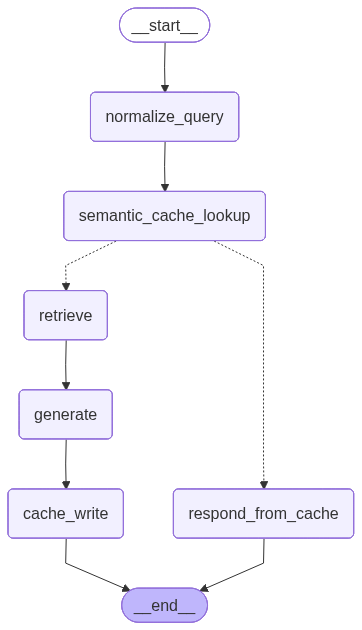

In [53]:
# ============== GRAPH WIRING ==============
graph = StateGraph(RAGState)

graph.add_node("normalize_query", normalize_query)
graph.add_node("semantic_cache_lookup", semantic_cache_lookup)
graph.add_node("respond_from_cache", respond_from_cache)
graph.add_node("retrieve", retrieve)
graph.add_node("generate", generate)
graph.add_node("cache_write", cache_write)

graph.set_entry_point("normalize_query")
graph.add_edge("normalize_query", "semantic_cache_lookup")

def _branch(state: RAGState) -> str:
    return "respond_from_cache" if state.get("cache_hit") else "retrieve"

graph.add_conditional_edges(
    "semantic_cache_lookup",
    _branch,
    {
        "respond_from_cache": "respond_from_cache",
        "retrieve": "retrieve"
    }
)

graph.add_edge("respond_from_cache", END)
graph.add_edge("retrieve", "generate")
graph.add_edge("generate", "cache_write")
graph.add_edge("cache_write", END)

memory = MemorySaver()
app = graph.compile(checkpointer=memory)
app

In [54]:
# ================= DEMO ===================
if __name__ == "__main__":
    thread_cfg = {"configurable": {"thread_id": "demo-user-1"}}

    q1 = "What is LangGraph ?"
    out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
    print("Answer:", out1["answer"])
    print("Citations:", out1.get("citations"))
    print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that allows users to compose stateful workflows for large language models (LLMs) in the form of graphs, enabling the management of complex interactions and data flows [doc-2]. It also features node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL), enhancing efficiency [doc-1].
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False


In [55]:
q1 = "Explain about LangGraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that allows users to compose stateful workflows for large language models (LLMs) in the form of graphs, enabling the management of complex interactions and data flows [doc-2]. It also features node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL), enhancing efficiency [doc-1].
Citations: ['(cache)']
Cache hit?: True


In [56]:
q1 = "Explain about LangGraph agents ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: LangGraph is a framework that allows users to compose stateful workflows for large language models (LLMs) in the form of graphs, enabling the management of complex interactions and data flows [doc-2]. It also features node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL), enhancing efficiency [doc-1].
Citations: ['(cache)']
Cache hit?: True


In [57]:
q1 = "Explain about agents in Langgraph ?"
out1 = app.invoke({"question": q1, "context_docs": [], "citations": []}, thread_cfg)
print("Answer:", out1["answer"])
print("Citations:", out1.get("citations"))
print("Cache hit?:", out1.get("cache_hit"))

Answer: In LangGraph, agents are components that facilitate the composition of stateful workflows using large language models (LLMs) as graphs. These agents can leverage features like node caching, which memoizes outputs based on inputs for a specified time-to-live (TTL) [doc-2]. Additionally, they can utilize Retrieval-Augmented Generation (RAG) to retrieve external context and incorporate it into prompts, enhancing the relevance and accuracy of responses [doc-3]. Furthermore, semantic caching allows agents to reuse previous answers when new questions are semantically similar, improving efficiency and response time [doc-4].
Citations: ['[doc-1]', '[doc-2]', '[doc-3]', '[doc-4]']
Cache hit?: False
